In [157]:
# normalization

In [158]:
import pandas as pd
import numpy as np

In [159]:
df=pd.read_csv('Day028_Sample_data_covid_toy.csv')

In [160]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [161]:
df['cough'].value_counts()

cough
Mild      62
Strong    38
Name: count, dtype: int64

In [162]:
df.isna().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [163]:
from sklearn.impute import SimpleImputer
si=SimpleImputer()
df['fever']=si.fit_transform(df[['fever']])

In [164]:
df.isna().sum()

age          0
gender       0
fever        0
cough        0
city         0
has_covid    0
dtype: int64

In [165]:
df['city'].value_counts()

city
Kolkata      32
Bangalore    30
Delhi        22
Mumbai       16
Name: count, dtype: int64

In [166]:
df['gender']=df['gender'].map({'Map':0,'Female':1})
df['cough']=df['cough'].map({'Mild':0,'Strong':1})
df['city']=df['city'].map({'Kolkata':0,'Bangalore':1,'Delhi':2,'Mumbai':3})
df['has_covid']=df['has_covid'].map({'Yes':1,'No':0})


In [167]:
df.head(3)

,age,gender,fever,cough,city,has_covid
0,60,NaN,103.0,0,0,0
1,27,NaN,100.0,0,2,1
2,42,NaN,101.0,0,2,0


In [168]:
x=df.drop(columns=['has_covid'])
y=df['has_covid']

In [169]:
from sklearn.model_selection import train_test_split


In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.2,
                                               random_state=42)

In [171]:
np.round(x_train.describe(),2)

,age,gender,fever,cough,city
count,80.00,47.0,80.00,80.00,80.00
mean,42.91,1.0,100.98,0.40,1.26
std,24.47,0.0,1.93,0.49,1.06
min,5.00,1.0,98.00,0.00,0.00
25%,20.00,1.0,100.00,0.00,0.00
50%,42.00,1.0,101.00,0.00,1.00
75%,65.00,1.0,102.00,1.00,2.00
max,84.00,1.0,104.00,1.00,3.00


In [172]:
from sklearn.preprocessing import MinMaxScaler

In [173]:
mn=MinMaxScaler()

In [174]:
x_train_mn=mn.fit_transform(x_train)

In [175]:
x_train_new=pd.DataFrame(x_train_mn,columns=x_train.columns)

In [176]:
np.round(x_train_new.describe(),2)

,age,gender,fever,cough,city
count,80.00,47.0,80.00,80.00,80.00
mean,0.48,0.0,0.50,0.40,0.42
std,0.31,0.0,0.32,0.49,0.35
min,0.00,0.0,0.00,0.00,0.00
25%,0.19,0.0,0.33,0.00,0.00
50%,0.47,0.0,0.50,0.00,0.33
75%,0.76,0.0,0.67,1.00,0.67
max,1.00,0.0,1.00,1.00,1.00


In [177]:
df1=pd.read_csv('Day028_tips.csv')

In [178]:
df1=df1.drop(columns=['day'])

In [179]:
df1.head()

,total_bill,tip,sex,smoker,time,size
0,16.99,1.01,Female,No,Dinner,2
1,10.34,1.66,Male,No,Dinner,3
2,21.01,3.50,Male,No,Dinner,3
3,23.68,3.31,Male,No,Dinner,2
4,24.59,3.61,Female,No,Dinner,4


In [180]:
df1.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
time          0
size          0
dtype: int64

In [181]:
df1['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [182]:
df1['sex']=df1['sex'].map({'Male':1,'Female':0})
df1['smoker']=df1['smoker'].map({'Yes':1,'No':0})
# df1['day']=df1['day'].map({'Sun':0,'Thur':1,'Fri':2,'Sat':3})
df1['time']=df1['time'].map({'Dinner':0,'Lunch':1})

In [183]:
df1.head()

,total_bill,tip,sex,smoker,time,size
0,16.99,1.01,0,0,0,2
1,10.34,1.66,1,0,0,3
2,21.01,3.50,1,0,0,3
3,23.68,3.31,1,0,0,2
4,24.59,3.61,0,0,0,4


In [184]:
x1=df1.drop(columns=['total_bill'])
y1=df1['total_bill']

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,
                                                   random_state=2)

In [187]:
np.round(x1_train.describe(),2)


,tip,sex,smoker,time,size
count,195.00,195.00,195.00,195.00,195.00
mean,2.95,0.65,0.41,0.28,2.53
std,1.35,0.48,0.49,0.45,0.94
min,1.00,0.00,0.00,0.00,1.00
25%,2.00,0.00,0.00,0.00,2.00
50%,2.71,1.00,0.00,0.00,2.00
75%,3.56,1.00,1.00,1.00,3.00
max,10.00,1.00,1.00,1.00,6.00


In [188]:
from sklearn.preprocessing import MinMaxScaler

In [189]:
mn1=MinMaxScaler()

In [190]:
x1_train_mn=mn1.fit_transform(x1_train)

In [191]:
x1_train_new=pd.DataFrame(x1_train_mn,columns=x1_train.columns)

In [192]:
np.round(x1_train_new.describe(),2)

,tip,sex,smoker,time,size
count,195.00,195.00,195.00,195.00,195.00
mean,0.22,0.65,0.41,0.28,0.31
std,0.15,0.48,0.49,0.45,0.19
min,0.00,0.00,0.00,0.00,0.00
25%,0.11,0.00,0.00,0.00,0.20
50%,0.19,1.00,0.00,0.00,0.20
75%,0.28,1.00,1.00,1.00,0.40
max,1.00,1.00,1.00,1.00,1.00


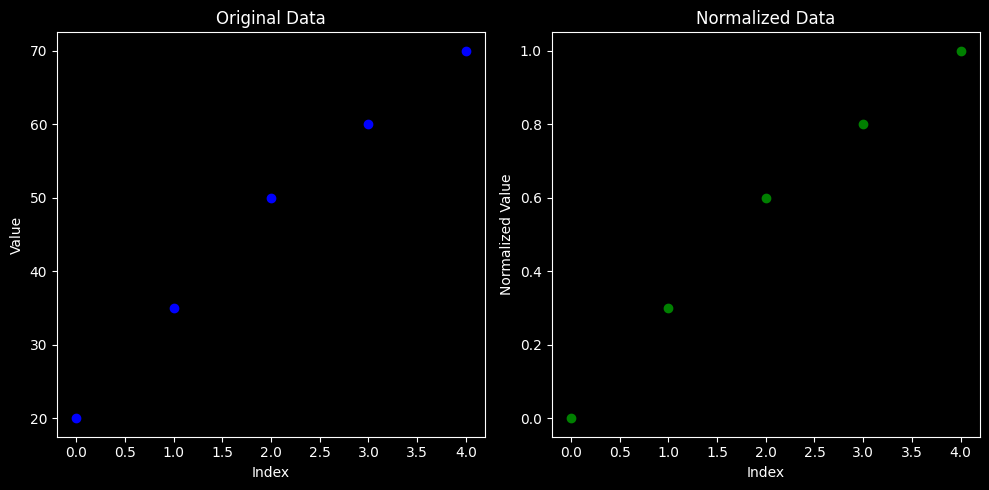

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Original data
data = np.array([20, 35, 50, 60, 70]).reshape(-1, 1)

# Min-Max Normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Plotting
plt.figure(figsize=(10, 5))

# Original Data Plot
plt.subplot(1, 2, 1)
plt.scatter(np.arange(len(data)), data, color='blue')
plt.title("Original Data")
plt.xlabel("Index")
plt.ylabel("Value")

# Normalized Data Plot
plt.subplot(1, 2, 2)
plt.scatter(np.arange(len(normalized_data)), normalized_data, color='green')
plt.title("Normalized Data")
plt.xlabel("Index")
plt.ylabel("Normalized Value")

plt.tight_layout()
plt.show()
